# Extract images with captions

## Download attention is all you need paper

In [1]:
import requests

# Attention is all you need paper
url = "https://arxiv.org/pdf/1706.03762"
filename = "files/paper.pdf"

repsonse = requests.get(url)

with open(filename, "wb") as f:
    f.write(repsonse.content)

In [2]:
import os

os.listdir("files")

['paper.pdf']

## Extract Images with caption

In [3]:
import pymupdf

doc = pymupdf.open(filename)

In [4]:
from pydantic import BaseModel, ConfigDict
from PIL.Image import Image as PILImage
from PIL import Image

class ExtractedImage(BaseModel):
    model_config = ConfigDict(arbitrary_types_allowed=True)
    image: PILImage
    caption: str

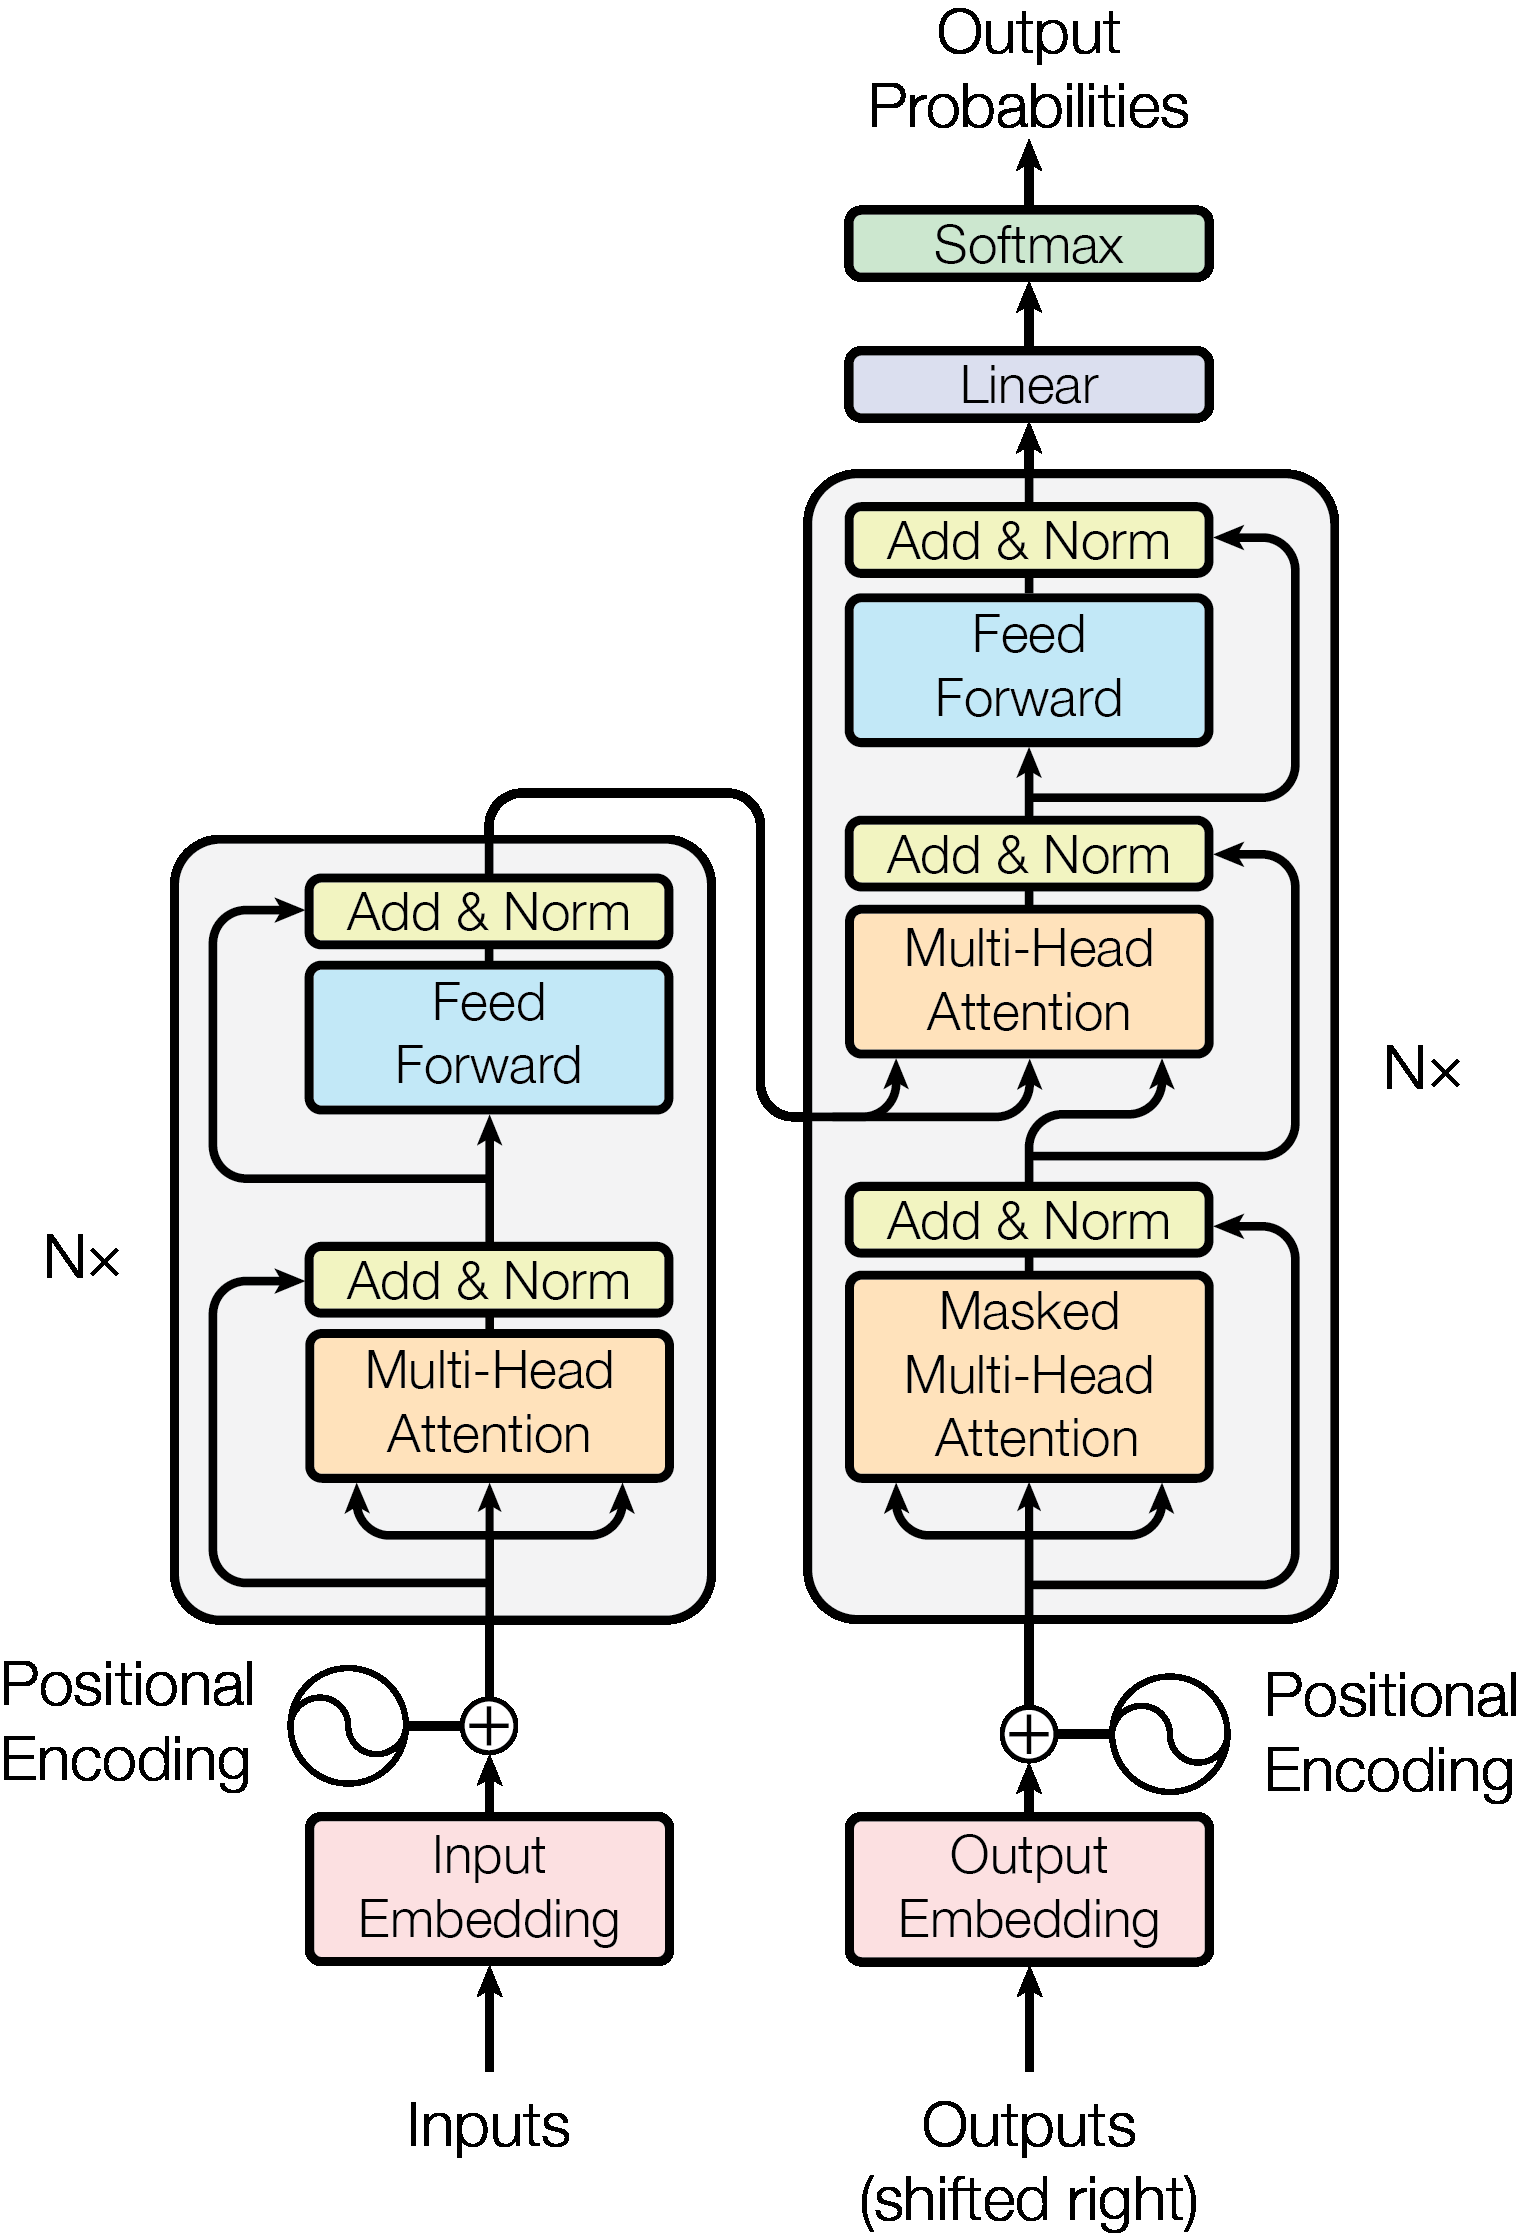

Figure 1: The Transformer - model architecture.
The Transformer follows this overall architecture using stacked self-attention and point-wise, fully
connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1,
respectively



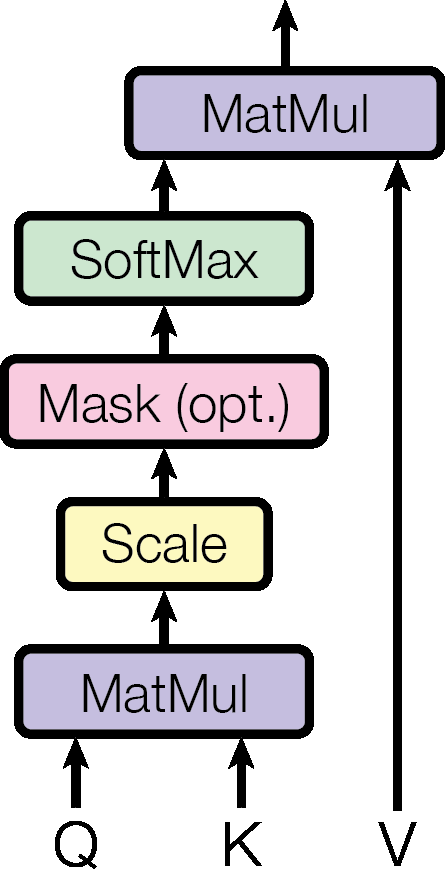

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several
attention layers running in parallel



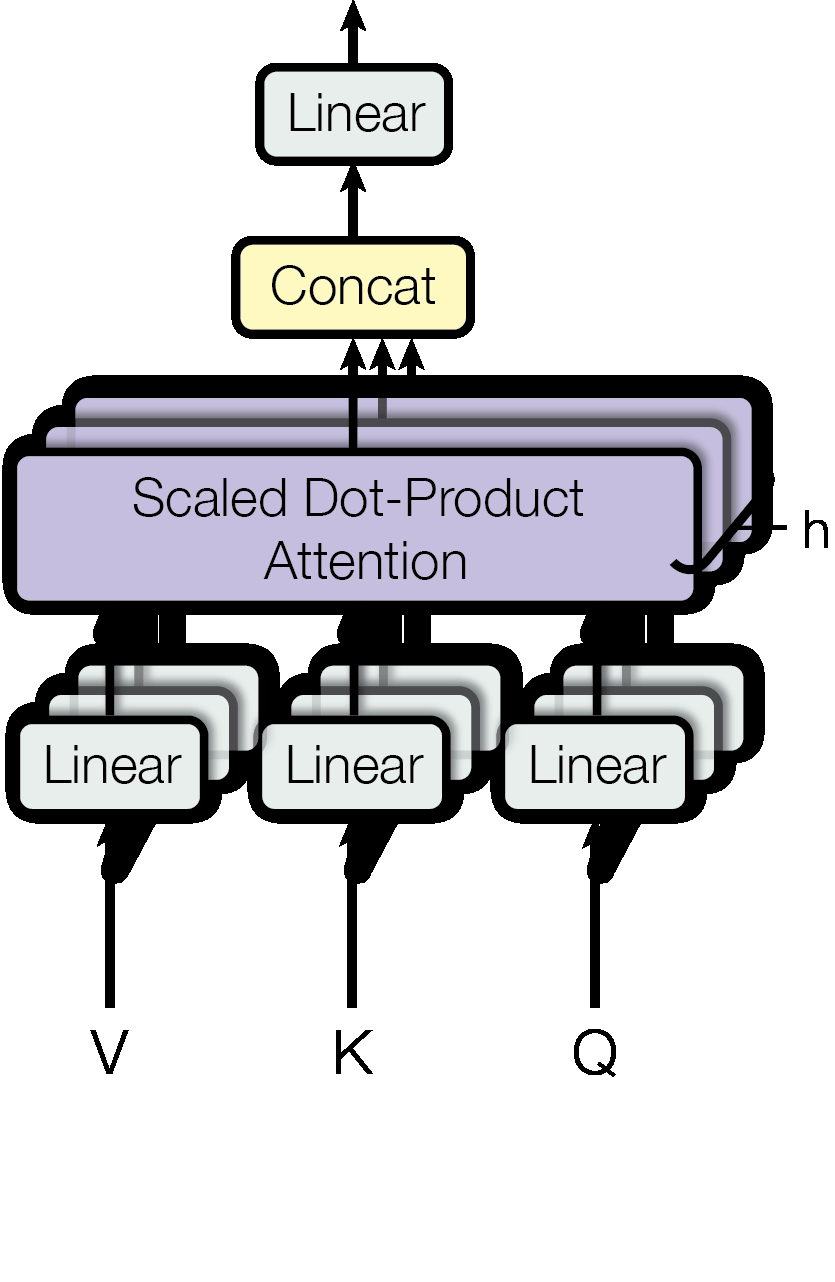

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several
attention layers running in parallel.
of the values, where the weight assigned to each value is computed by a compatibility function of the
query with the corresponding key.



In [5]:
import io

for page_num, page in enumerate(doc):
    # Get all images on the page
    images = page.get_images(full=True)
    texts = page.get_text("text")
    
    # Extract each image
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        
        # Get the bounding box of the image
        img_rect = page.get_image_bbox(img)
        
        # Expand the bounding box to get nearby text
        expanded_rect = pymupdf.Rect(0, img_rect.y0 + 70, 
                                  1440, img_rect.y1 + 70)
        
        # Get the text near the image
        nearby_text = page.get_text("text", clip=expanded_rect)
        img = ExtractedImage(
            image=Image.open(io.BytesIO(image_bytes)),
            caption=nearby_text
        )
        display(img.image)
        print(img.caption)
